チューリングパターンアニメーション

パターンのルールは二つ
- 自分の周囲lマスを見てmこ以上の自分と違う色があれば, 自分は色をひっくり返す
- 自分の周囲nマスを見て, 全てのますが自分と同じ色ならば, 自分は色をひっくり返す

このルールでアニメーションを作る.

MovieWriter imagemagick unavailable.


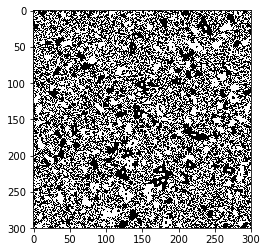

In [23]:
import random
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
import matplotlib.animation as animation

N=300 #マス目の数
l,m=2,18 #周りに何個違う色があればひっくり返るか
n=3 #周囲何ます分に同じ色があればひっくり返るか
Mat=[[random.randint(0,1) for i in range(N)] for i in range(N)]
#print(Mat)
process=50

def check(i,j):
    count=0
    for s in range(max(0,i-l),min(N,i+l+1)):
        for t in range(max(0,j-l),min(N,j+l+1)):
            if Mat[s][t] !=Mat[i][j]:
                count +=1
    if count>=m:
        return True
    for s in range(max(0,i-n),min(N,i+n+1)):
        for t in range(max(0,j-n),min(N,j+n+1)):
            if Mat[s][t] !=Mat[i][j]:
                return  False
    return True


def color(A):
    B = deepcopy(A)
    for i in range(N):
        for j in range(N):
            if check(i, j):
                B[i][j] = (Mat[i][j] + 1) % 2
    return B
#fig, ax = plt.subplots(figsize=(N, N))
fig = plt.figure()   
ims=[]
for i in range(process):
    image=np.array(Mat)*255
    image=plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
    #plt.show()
    ims.append([image]) # グラフを生成
    Mat=color(Mat)

ani = animation.ArtistAnimation(fig, ims, interval=process*10, blit=True,)
ani.save('anim.gif', writer="imagemagick")

In [22]:
 
ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True,)
ani.save('anime.gif', writer="imagemagick")

MovieWriter imagemagick unavailable.


MovieWriter imagemagick unavailable.


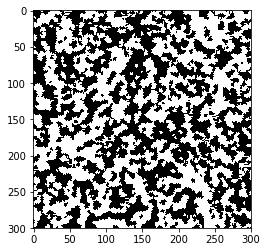

In [2]:
import random
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
import matplotlib.animation as animation

N=300
m=4
n=2
Mat=[[random.randint(0,1) for i in range(N)] for i in range(N)]
#print(Mat)

def check(i,j):
    count=0
    for s in range(max(0,i-1),min(N,i+2)):
        for t in range(max(0,j-1),min(N,j+2)):
            if Mat[s][t] !=Mat[i][j]:
                count +=1
    if count>=m:
        return True
    return False


def color(A):
    B = deepcopy(A)
    for i in range(N):
        for j in range(N):
            if check(i, j):
                B[i][j] = (Mat[i][j] + 1) % 2
    return B
#fig, ax = plt.subplots(figsize=(N, N))
fig = plt.figure()   
ims=[]
process=50
for i in range(process):
    image=np.array(Mat)*255
    image=plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
    #plt.show()
    ims.append([image]) # グラフを生成
    Mat=color(Mat)

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,)
ani.save('anim.gif', writer="imagemagick")